# Activation Functions On Minst Dataset :

This project aims to investigate the impact of different activation functions on the performance of neural networks for the task of MNIST handwritten digit recognition. The MNIST dataset is a widely used benchmark in the field of computer vision and machine learning, making it an ideal candidate for studying the effects of activation functions on model accuracy and convergence.

### Importing Libraries :

NumPy: NumPy is package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions to operate on these arrays efficiently.It is widely used for tasks such as numerical computations, data manipulation, and linear algebra operations.

pandas: pandas is a powerful data manipulation and analysis library for Python. It offers data structures like DataFrames and Series, which allow you to store, manipulate, and analyze tabular data easily. pandas provides tools for data cleaning, transformation, aggregation, and exploration, making it an essential library for working with structured data.

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more. Matplotlib gives you extensive control over plot customization, including labels, colors, legends, and annotations, allowing you to effectively communicate insights from your data

Seaborn: Seaborn is a statistical data visualization library built on top of Matplotlib. It offers a higher-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating complex visualizations, such as heatmaps, violin plots, and pair plots, by providing high-level functions with sensible default settings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

### Splitting Dataset :

Splitting the data refers to dividing the dataset into separate subsets for training, validation, and testing purposes. This division is essential to assess the performance of a machine learning model on unseen data and prevent overfitting. Here are the common types of data splits:

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Reshaping :

Reshaping in the context of the MNIST dataset involves transforming the 2D grid of image pixels into a format suitable for machine learning. This can include flattening the image into a 1D array or maintaining the 2D structure, depending on the algorithm's requirements.

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### Normalizing :

Normalizing a dataset involves scaling the data values to a common range, often between 0 and 1. For the MNIST dataset, this means dividing each pixel value by 255 to transform it into the [0, 1] range. This ensures consistent and optimal data representation for machine learning algorithms.

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### To Categorical : 

Converting labels to categorical means representing class labels as binary vectors, where each class is uniquely identified by a 'hot' (1) bit while the rest are 'cold' (0). This transformation is used for multi-class classification tasks like MNIST to make labels compatible with machine learning algorithms.

In [12]:
num_classes = 10

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building Model : 

To build a model for the MNIST classification project, a Convolutional Neural Network (CNN) is crafted. This architecture involves stacking convolutional and pooling layers for feature extraction, followed by fully connected layers for classification. The model is compiled with an optimizer (e.g., Adam), categorical cross-entropy loss, and accuracy metric to guide training. This design enables the model to effectively learn and classify numbers from the dataset,

In [15]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(num_classes, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 128                                                #initializing batch size
epochs = 5                                                      #initialize epoches

### Compiling Model :

Compiling the model for the MNIST classification project entails configuring the model's learning process. This involves selecting a loss function to measure prediction accuracy, choosing an optimizer to update model parameters, and specifying evaluation metrics such as accuracy to monitor its performance. This setup readies the model for effective training, guiding its adjustments towards making accurate predictions on the MNIST dataset.

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

### Training Model :

To train a model for the MNIST classification project, you load and preprocess the dataset, create a CNN model architecture, compile it with loss and optimizer, train the model using the training data while monitoring validation, and evaluate its accuracy on the test set.

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 12s 22ms/step - loss: 0.2575 - accuracy: 0.9250 - val_loss: 0.1211 - val_accuracy: 0.9643
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1039 - accuracy: 0.9686 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0690 - accuracy: 0.9794 - val_loss: 0.0816 - val_accuracy: 0.9747
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0654 - val_accuracy: 0.9807
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0644 - val_accuracy: 0.9809


### Loss Curve :

A loss curve represents how a model's error changes during training. It helps monitor convergence and identify overfitting. For the Fashion MNIST project, design a CNN, compile it, train over epochs, and plot the training and validation loss.

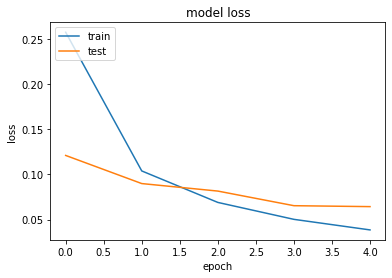

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Building Neural Network With All Activation Functions

### Activation Function : 

Activation function is a function used in a neural network to decide whether a neuron should "fire" or not based on the inputs it receives. It adds non-linearity to the network, helping it learn complex patterns. This function transforms the output of a neuron into a more useful form for the next layer of neurons. It's like the on/off switch for a neuron, determining if it should be active or not based on the input data.

### Sigmoid Activation Function :

The sigmoid activation function is a smooth curve that takes an input and maps it to a value between 0 and 1. It's used to model probabilities, especially in binary classification tasks. However, its tendency to make gradients vanish for extreme inputs can hinder training in deep networks. As a result, it's less commonly used in modern networks compared to alternatives like ReLU.

### Tanh Activation Function :

The tanh (hyperbolic tangent) activation function is a smooth curve that transforms an input to an output between -1 and 1. It's similar to the sigmoid but with a zero-centered output range. While useful for specific cases like zero-centered data or certain network architectures, it still faces the issue of vanishing gradients in deep networks, which can impact training effectiveness.

### ReLu Activation Function :

The ReLU (Rectified Linear Unit) activation function is a simple and widely used function in neural networks. It keeps positive input values unchanged and sets negative values to zero. ReLU helps address vanishing gradient issues, speeds up training, and is a popular choice for hidden layers. However, it can suffer from "dying ReLU" problem where some neurons become inactive. Variants like Leaky ReLU and others aim to overcome this limitation.

Epoch 1/20
469/469 [==============================] - 10s 18ms/step - loss: 0.3818 - accuracy: 0.8909 - val_loss: 0.3326 - val_accuracy: 0.9011
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3088 - accuracy: 0.9130 - val_loss: 0.2943 - val_accuracy: 0.9153
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2949 - accuracy: 0.9178 - val_loss: 0.2938 - val_accuracy: 0.9169
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2903 - accuracy: 0.9193 - val_loss: 0.2963 - val_accuracy: 0.9160
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2829 - accuracy: 0.9215 - val_loss: 0.2900 - val_accuracy: 0.9184
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2797 - accuracy: 0.9227 - val_loss: 0.2982 - val_accuracy: 0.9165
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2755 - accuracy: 0.9236 - val_loss: 0.2832 - val_accuracy: 0.922

469/469 [==============================] - 7s 16ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0709 - val_accuracy: 0.9808
Epoch 19/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0722 - val_accuracy: 0.9825
Epoch 20/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0749 - val_accuracy: 0.9820
Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 0.2588 - accuracy: 0.9259 - val_loss: 0.1432 - val_accuracy: 0.9580
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1036 - accuracy: 0.9693 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.0775 - val_accuracy: 0.9766
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 5/

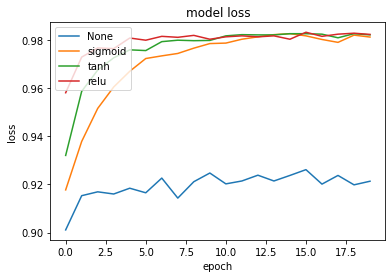

In [21]:
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    plt.plot(history.history['val_accuracy'])    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')